# This is a the Test Simulation for eROSTIA Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## New in Gamma-0
- No changes between beta-0 and gamma-0

In [2]:
ver = 'gamma-0'
cv_tab = Table.read('workspace/target_files/eROSITA/{}/FPS_EROSITA_TIER1_v2.fits'.format(ver))
cv_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes15,bytes15,int32,float32
299.071313708,52.9798401074,ident_faint,cvfaint,1,1.0
272.131456958,-26.4987580506,ident_faint,cvfaint,1,1.0
112.991132578,-5.60903737267,ident_faint,cvfaint,1,1.0
238.360094461,-21.3869842887,ident_bright,cvbright,1,1.0
93.70804063,7.84052241925,ident_grey,cvgrey,1,1.0
223.789468412,-56.4776482319,ident_faint,cvfaint,1,1.0
280.129659116,-8.03709734227,ident_faint,cvfaint,1,1.0
51.3035526671,54.2689651388,ident_grey,cvgrey,1,1.0
121.382792404,-39.1569159021,ident_faint,cvfaint,1,1.0


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


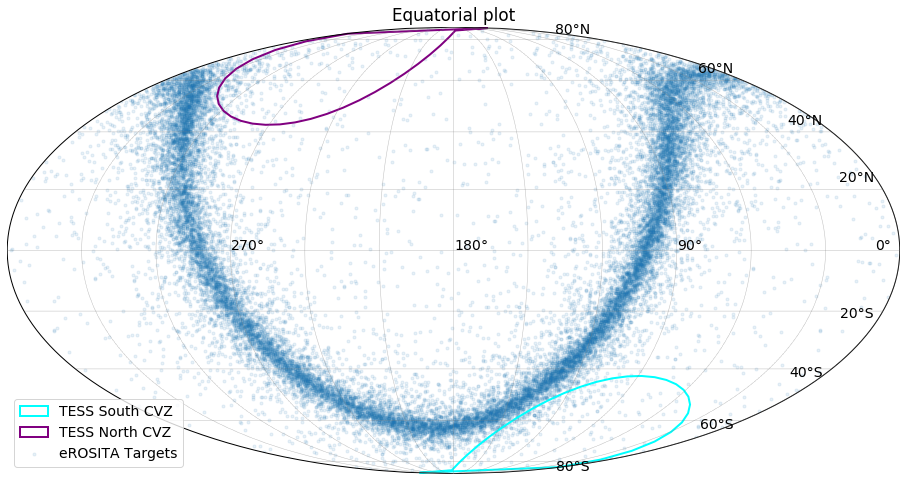

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot eROSITA Targets
cvx,cvy = bmap(cv_tab['ra'],cv_tab['dec'])
bmap.scatter(cvx,cvy,marker='.',label='eROSITA Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

In [5]:
target_tab['ra'] = cv_tab['ra']
target_tab['dec'] = cv_tab['dec']

In [6]:
cadence_arr = np.repeat('mwm_erosita_medium_1x2',len(cv_tab))
cadence_arr[(cv_tab['cadence'] == 'ident_faint')] = 'mwm_erosita_faint_1x3'
cadence_arr[(cv_tab['cadence'] == 'ident_bright')] = 'mwm_erosita_bright_1x1'

target_tab['cadence'] = cadence_arr
target_tab

ra,dec,cadence
float64,float64,str22
299.071313708,52.9798401074,mwm_erosita_faint_1x3
272.131456958,-26.4987580506,mwm_erosita_faint_1x3
112.991132578,-5.60903737267,mwm_erosita_faint_1x3
238.360094461,-21.3869842887,mwm_erosita_bright_1x1
93.70804063,7.84052241925,mwm_erosita_medium_1x2
223.789468412,-56.4776482319,mwm_erosita_faint_1x3
280.129659116,-8.03709734227,mwm_erosita_faint_1x3
51.3035526671,54.2689651388,mwm_erosita_medium_1x2
121.382792404,-39.1569159021,mwm_erosita_faint_1x3


In [7]:
target_tab['type'] = cv_tab['type']
target_tab['priority'] = np.repeat(np.array(45,dtype='int32'),len(cv_tab))
target_tab['value'] = cv_tab['value']

In [8]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str22,bytes15,int32,float32
299.071313708,52.9798401074,mwm_erosita_faint_1x3,cvfaint,45,1.0
272.131456958,-26.4987580506,mwm_erosita_faint_1x3,cvfaint,45,1.0
112.991132578,-5.60903737267,mwm_erosita_faint_1x3,cvfaint,45,1.0
238.360094461,-21.3869842887,mwm_erosita_bright_1x1,cvbright,45,1.0
93.70804063,7.84052241925,mwm_erosita_medium_1x2,cvgrey,45,1.0
223.789468412,-56.4776482319,mwm_erosita_faint_1x3,cvfaint,45,1.0
280.129659116,-8.03709734227,mwm_erosita_faint_1x3,cvfaint,45,1.0
51.3035526671,54.2689651388,mwm_erosita_medium_1x2,cvgrey,45,1.0
121.382792404,-39.1569159021,mwm_erosita_faint_1x3,cvfaint,45,1.0


In [9]:
target_tab.write('{}/mwm_eROSITA_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table

In [10]:
cv_cad_tab = Table.read('workspace/target_files/eROSITA/{}/FPS_EROSITA_TIER1_cadence_v2.fits'.format(ver))
cv_cad_tab

cadence,nepochs,delta [3],softness,lunation,instrument
bytes15,int32,float32,float32,float32,bytes4
ident_bright,1,0.0 .. 0.0,1.0,1.0,boss
ident_grey,2,0.0 .. 0.0,1.0,0.5,boss
ident_faint,3,0.0 .. 0.001,1.0,0.0,boss


In [11]:
cadence_tab = Table()

In [12]:
cadence_tab['cadence'] = np.array(['mwm_erosita_bright_1x1', 'mwm_erosita_medium_1x2','mwm_erosita_faint_1x3'])
cadence_tab['nepochs'] = np.array([1,2,3],dtype='int32')
delta = np.array([[0,np.nan,np.nan]
                ,[0,0,np.nan]
                ,[0,0,0]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0. nan nan]
 [ 0.  0. nan]
 [ 0.  0.  0.]]


In [13]:
delta_min = np.array([[0,np.nan,np.nan]
                ,[0,0,np.nan]
                ,[0,0,0]],dtype='float32')

print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0. nan nan]
 [ 0.  0. nan]
 [ 0.  0.  0.]]


In [14]:
#Allow an hour for weather
delta_max = np.array([[0,np.nan,np.nan]
                ,[0,0.04,np.nan]
                ,[0,0.04,0.04]],dtype='float32')

print(delta_max)
cadence_tab['delta_max'] = delta_max

[[0.    nan  nan]
 [0.   0.04  nan]
 [0.   0.04 0.04]]


In [15]:
lunation = np.array([[1,np.nan,np.nan]
                ,[0.35,0.35,np.nan]
                ,[0.35,0.35,0.35]],dtype='float32')

print(lunation)
cadence_tab['lunation'] = lunation

[[1.    nan  nan]
 [0.35 0.35  nan]
 [0.35 0.35 0.35]]


In [16]:
instrument = np.array([['boss',np.nan,np.nan]
                ,['boss','boss',np.nan]
                ,['boss','boss','boss']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['boss' 'nan' 'nan']
 ['boss' 'boss' 'nan']
 ['boss' 'boss' 'boss']]


In [17]:
cadence_tab.write('{}/mwm_eROSITA_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [18]:
test =  Table.read('{}/mwm_eROSITA_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [3],delta_min [3],delta_max [3],lunation [3],instrument [3]
bytes22,int32,float32,float32,float32,float32,bytes16
mwm_erosita_bright_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,boss .. nan
mwm_erosita_medium_1x2,2,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.35 .. nan,boss .. nan
mwm_erosita_faint_1x3,3,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,0.35 .. 0.35,boss .. boss
